In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt


In [2]:
df = pd.read_csv("uber.csv")
df.dropna(inplace=True)

# Extract datetime features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year


In [3]:
df.drop(['key', 'pickup_datetime'], axis=1, inplace=True)

# Step 2: Remove outliers/unrealistic data
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df = df[(df['pickup_latitude'] != 0) & (df['dropoff_latitude'] != 0)]


Text(0.5, 1.0, 'Outliers in Fare Amount')

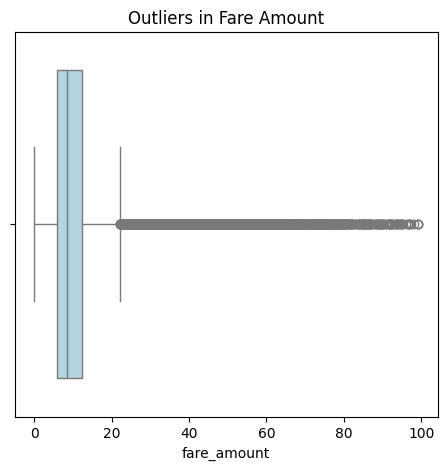

In [4]:
plt.figure(figsize=(12,5))

# Boxplot (Outliers)
plt.subplot(1,2,1)
sns.boxplot(x=df['fare_amount'], color='lightblue')
plt.title("Outliers in Fare Amount")


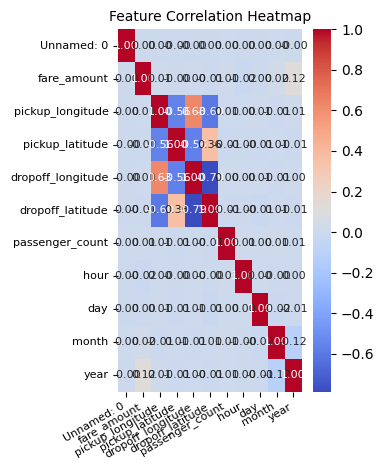

In [5]:
# Heatmap (Correlation)
plt.subplot(1,2,2)
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":8})
plt.title("Feature Correlation Heatmap", fontsize=10)
plt.xticks(rotation=30, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

In [6]:
# Step 4: Split data
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n{name}")
    print("R² Score:", round(r2, 3))
    print("RMSE:", round(rmse, 3))


Linear Regression
R² Score: 0.018
RMSE: 9.246

Ridge Regression
R² Score: 0.018
RMSE: 9.246

Lasso Regression
R² Score: 0.018
RMSE: 9.247
